# Project 5

Cross-dependence

Pick two stocks, use daily returns and evaluate their cross-dependence (cross-autocorrelation).

1) Compute cross-correlograms. Are the lagged cross-autocorrelations significant?

2) Estimate a VAR(1). Does one stock affect the other? Look at the coefficients.

3) Compute an Impulse Response Function, making the necessary assumptions (EXTRA)

4) Interpret these results

We are going to analize four diferent pairs:

- JPM (JPMorgan Chase & Co.) and BK (The Bank of New York Mellon COrporation) -> Both are from the Financial Services sector

- GOOGL (Alphabet Inc.) and AKAM (Akamai Technologies) -> Both are in the Technology sector

- AAPL (Apple Inc.) and IBM (IBM) -> Both are in the Information Technology Sector

- DELL (DELL Technologies) and NVDA (Nvidia) -> Both are in the Information Technology sector

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import random
import statsmodels

In [3]:
warnings.simplefilter(action="ignore", category=FutureWarning)

tickers = ['JPM','BK','GOOGL','AKAM','AAPL','IBM','DELL','NVDA']

n_tickers = len(tickers)

# Only looking daily returns from the past 6 months
start_date = '2014-01-01'
end_date = '2023-12-31'

# Download the daily data from stocks
price = yf.download(tickers, start=start_date, end=end_date, progress=False)['Adj Close']
daily_returns_stocks = price.pct_change()

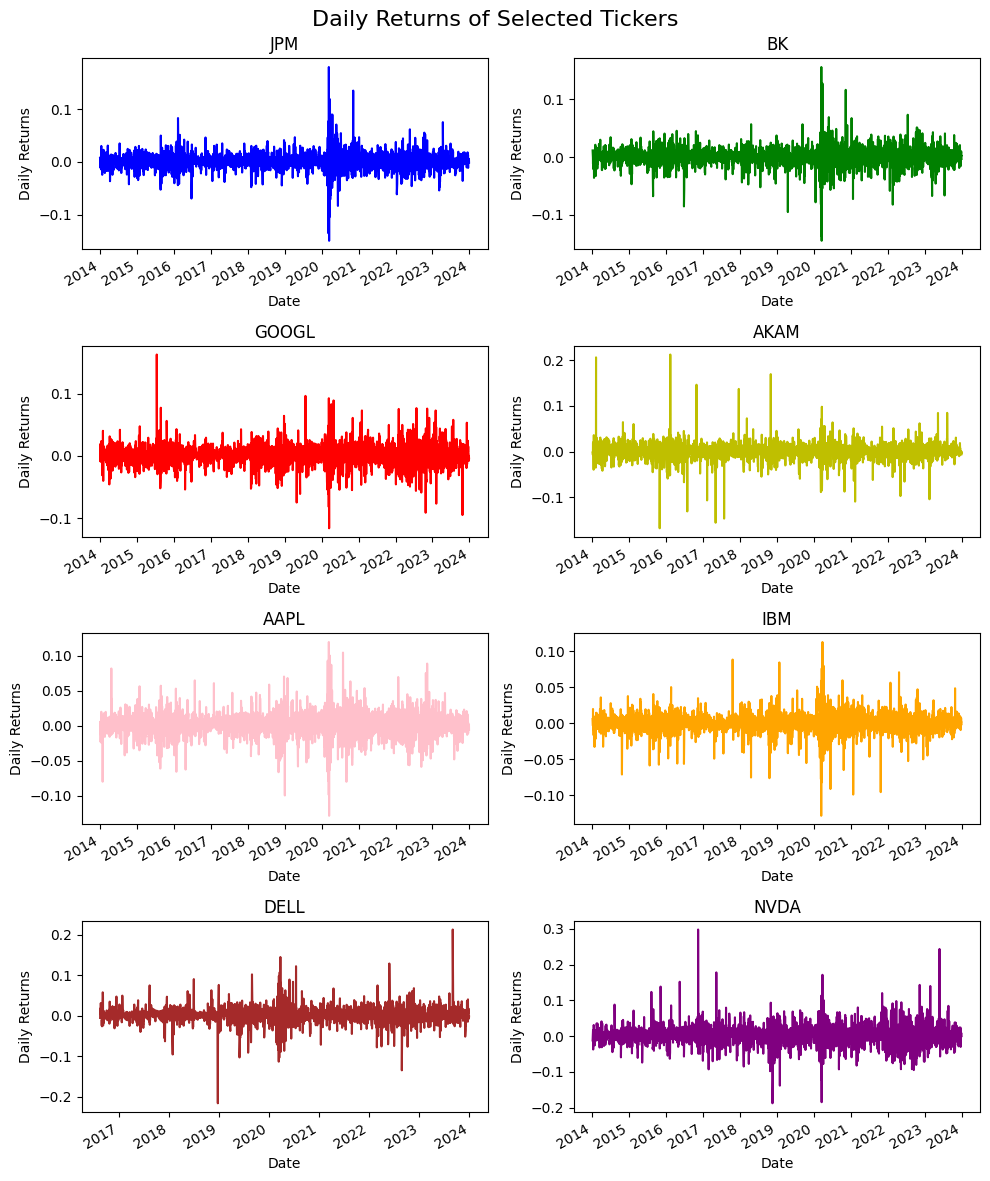

In [4]:
# Assuming you have 4 tickers
fig, axes = plt.subplots(4, 2, figsize=(10, 12))  # Replace X and Y with desired figure size

axes = axes.flatten()
col = ['b','g','r','y','pink','orange','brown','purple']
for i, tik in enumerate(tickers):
    daily_returns_stocks[tik].plot(ax=axes[i], title=tik,color=col[i])
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Daily Returns')

fig.suptitle('Daily Returns of Selected Tickers', fontsize=16)
plt.tight_layout()
plt.show()

# Cross-Correlograms

For Cross-correlogram between GOOGL and AKAM
Lag 0 have the highest positive correlation, cor: 0.39
Lag 15 have the lowest negative correlation, cor: -0.04
For Cross-correlogram between JPM and BK
Lag 0 have the highest positive correlation, cor: 0.77
Lag 1 have the lowest negative correlation, cor: -0.08
For Cross-correlogram between AAPL and IBM
Lag 0 have the highest positive correlation, cor: 0.41
Lag 1 have the lowest negative correlation, cor: -0.11
For Cross-correlogram between DELL and NVDA
Lag 0 have the highest positive correlation, cor: 0.47
Lag 6 have the lowest negative correlation, cor: -0.07


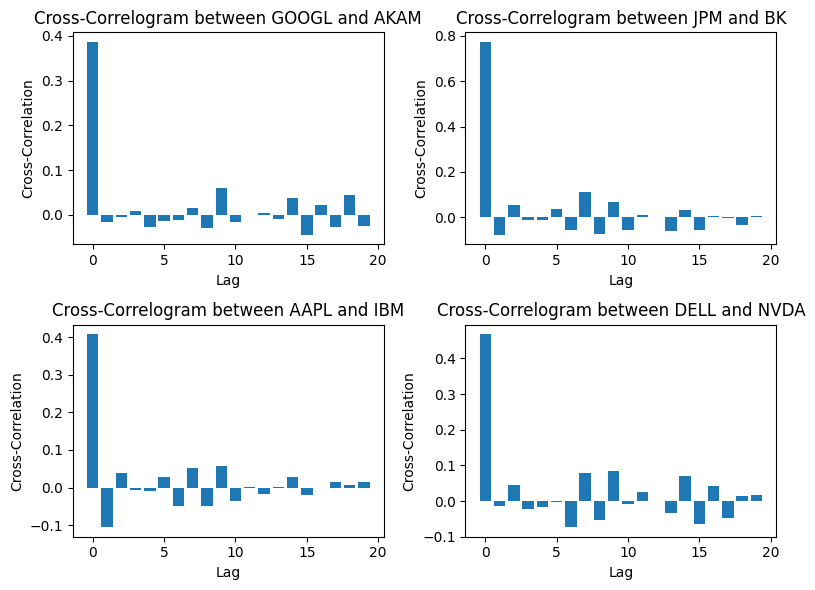

In [5]:
from statsmodels.tsa.stattools import ccf

def cross_correlogram_two_stocks(stocks,ax,nlags=20):
    stock1,stock2 = stocks
    cross_correlogram = ccf(daily_returns_stocks[stock1].dropna(),daily_returns_stocks[stock2].dropna(),adjusted=False,nlags=nlags)
    
    # The cross-correlation function of x and y: the element at index k is the correlation between 
    # {x[k], x[k+1], …, x[n]} and {y[0], y[1], …, y[m-k]}, where n and m are the lengths of x and y, respectively.

    max_cor = max(enumerate(cross_correlogram), key=lambda x: x[1]) 
    min_cor = min(enumerate(cross_correlogram), key=lambda x: x[1])
    print(f"For Cross-correlogram between {stock1} and {stock2}")
    print(f"Lag {max_cor[0]} have the highest positive correlation, cor: {max_cor[1]:.2f}")
    print(f"Lag {min_cor[0]} have the lowest negative correlation, cor: {min_cor[1]:.2f}")
    
    ax.bar(range(len(cross_correlogram)),cross_correlogram)
    ax.set_title(f'Cross-Correlogram between {stock1} and {stock2}')
    ax.set_xlabel('Lag')
    ax.set_ylabel('Cross-Correlation')
    

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_figheight(6)
fig.set_figwidth(8)
cross_correlogram_two_stocks(["GOOGL","AKAM"],ax1)
cross_correlogram_two_stocks(["JPM","BK"],ax2)
cross_correlogram_two_stocks(["AAPL","IBM"],ax3)
cross_correlogram_two_stocks(["DELL","NVDA"],ax4)

plt.tight_layout()
plt.show()

# Conclusion

Daily returns are stationary

1. GOOGL and AKAM:

- The graph "Cross-correlogram between GOOGL and AKAM" shows how correlated the GOOGL lags are to AKAM. The first lag is higly positive correlated (39%). If we try to create a time series function with the ADL(1,L) model, where L is the number of lags from the exogenous time series, $a_1$ would be between -1 and 0 because the CCF shape converges to 0 and the decay pattern is oscillatory. 

2. JPM and BK:

- The graph "Cross-correlogram between JPM and BK" shows how correlated the JPM lags are to BK. Only the first lag is higly positive correlated (77%). If we try to create a time series function with the ADL(1,L) model, where L is the number of lags from the exogenous time series, $a_1$ would be between -1 and 0 because the CCF shape converges to 0 and the decay pattern is oscillatory. 

3. AAPL and IBM:

- The graph "Cross-correlogram between AAPL and IBM" shows how correlated the AAPL lags are to IBM. The first lag is higly positive correlated (41%) and the second lag is negative correlated (11%). If we try to create a time series function with the ADL(1,L) model, where L is the number of lags from the exogenous time series, $a_1$ would be between -1 and 0 because the CCF shape converges to 0 and the decay pattern is oscillatory.

4. DELL and NVDA:

- The graph "Cross-correlogram between DELL and NVDA" shows how correlated the DELL lags are to NVDA. The first lag is higly positive correlated (47%). If we try to create a time series function with the ADL(1,L) model, where L is the number of lags from the exogenous time series, $a_1$ would be between -1 and 0 because the CCF shape converges to 0 and the decay pattern is oscillatory. 

# Vector AutoRegressive VAR(1) Model 

In [8]:
from statsmodels.tsa.api import VAR

var_data = daily_returns_stocks[["GOOGL", "AKAM"]].dropna()

model = VAR(var_data)
var_model_fitted = model.fit(1) 

print(var_model_fitted.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 08, Oct, 2024
Time:                     19:06:32
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -16.0792
Nobs:                     2514.00    HQIC:                  -16.0881
Log likelihood:           13100.6    FPE:                1.02531e-07
AIC:                     -16.0931    Det(Omega_mle):     1.02287e-07
--------------------------------------------------------------------
Results for equation GOOGL
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            0.000838         0.000350            2.391           0.017
L1.GOOGL        -0.052418         0.021607           -2.426           0.015
L1.AKAM          0.004127         0.019217            0.215           0.830

Res

/home/pedro/Documents/quantitativeFinance/quant_fin/env_quant/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [9]:
var_data = daily_returns_stocks[["JPM", "BK"]].dropna()

model = VAR(var_data)
var_model_fitted = model.fit(1) 

print(var_model_fitted.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 08, Oct, 2024
Time:                     19:06:49
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -17.1980
Nobs:                     2514.00    HQIC:                  -17.2069
Log likelihood:           14507.0    FPE:                3.34934e-08
AIC:                     -17.2119    Det(Omega_mle):     3.34136e-08
--------------------------------------------------------------------
Results for equation JPM
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const          0.000736         0.000337            2.182           0.029
L1.JPM        -0.080334         0.031350           -2.562           0.010
L1.BK         -0.015007         0.031170           -0.481           0.630

Results for equ

/home/pedro/Documents/quantitativeFinance/quant_fin/env_quant/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [13]:
var_data = daily_returns_stocks[["AAPL", "IBM"]].dropna()

model = VAR(var_data)
var_model_fitted = model.fit(1) 

print(var_model_fitted.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 08, Oct, 2024
Time:                     19:08:27
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -16.6709
Nobs:                     2514.00    HQIC:                  -16.6798
Log likelihood:           13844.4    FPE:                5.67375e-08
AIC:                     -16.6848    Det(Omega_mle):     5.66023e-08
--------------------------------------------------------------------
Results for equation AAPL
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const           0.001191         0.000355            3.352           0.001
L1.AAPL        -0.032358         0.021716           -1.490           0.136
L1.IBM         -0.112371         0.026474           -4.244           0.000

Results f

/home/pedro/Documents/quantitativeFinance/quant_fin/env_quant/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [14]:
var_data = daily_returns_stocks[["DELL", "NVDA"]].dropna()

model = VAR(var_data)
var_model_fitted = model.fit(1) 

print(var_model_fitted.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 08, Oct, 2024
Time:                     19:08:33
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -14.6692
Nobs:                     1853.00    HQIC:                  -14.6805
Log likelihood:           8355.03    FPE:                4.18277e-07
AIC:                     -14.6871    Det(Omega_mle):     4.16926e-07
--------------------------------------------------------------------
Results for equation DELL
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const           0.001296         0.000526            2.465           0.014
L1.DELL         0.021799         0.025725            0.847           0.397
L1.NVDA        -0.016563         0.018224           -0.909           0.363

Results f

/home/pedro/Documents/quantitativeFinance/quant_fin/env_quant/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


## Conclusions:

### For the VAR(1) model with GOOGL and AKAM daily returns:

1. GOOGL as the dependent variable:

- The negative coefficient for the lagged daily returns of GOOGL is significant (p-value equal to 0.015) and implies a negative autocorrelation in GOOGL's daily returns. This means that if GOOGL has a positive daily return on one day, it tends to have a slighly negative daily return on the next day.

- The lagged daily returns of AKAM aren't significant on GOOGL daily returns (p-value equal to 0.830), meaning that AKAM past performance isn't good to predict GOOGL's next -day return.

2. AKAM as the dependent variable:

- The coefficients for both lagged daily returns of GOOGL and lagged daily returns of AKAM aren't significant. The model will not perform well.

### For the VAR(1) model with JPM and BK daily returns:

1. JPM as the dependent variable:

- The negative coefficient for the lagged daily returns of JPM is significant (p-value equai to 0.010) and implies a negative autocorrelation in JPM's daily returns. This means that if JPM has a positive daily return on one day, it tends to have a slighly negative daily return on the next day.

- The lagged daily returns of BK aren't significant on JPM daily returns (p-value equal to 0.630), meaning that BK past performance isn't good to predict JPM's next -day return.

2. BK as the dependent variable:

- The negative coefficient for the lagged daily returns of JPM is significant (p-value equal to 0.028) and implies a negative correlation in BK's daily returns. This means that if JPM has a positive daily return on one day, BK tends to have a slighly negative daily return on the next day.

### For the VAR(1) model with AAPL and IBM daily returns:

1. AAPL as the dependent variable:

- The negative coefficient for the lagged daily returns of IBM is significant (p-value equai to 0.000) and implies a negative autocorrelation in AAPL's daily returns. This means that if IBM has a positive daily return on one day, AAPL tends to have a slighly negative daily return on the next day.

- The lagged daily returns of AAPL isn't siginificant and implies small autocorrelation in AAPl daily returns

2. IBM as the dependent variable:

- The negative coefficient for the lagged daily returns of AAPL is significant (p-value equai to 0.012) and implies a negative autocorrelation in IBM's daily returns. This means that if AAPL has a positive daily return on one day, IBM tends to have a slighly negative daily return on the next day.

- The lagged daily returns of IBM isn't siginificant and implies small autocorrelation in IBM daily returns

### For the VAR(1) model with DELL and NVDA daily returns:

1. DELL as the dependent variable:

- The lagged daily returns of DELL and NVDA aren't significant to predict the next-day daily return of DELL. 

2. NVDA as the dependent variable:

- The negative coefficient for the lagged daily returns of DELL is significant (p-value equai to 0.015) and implies a negative autocorrelation in NVDA's daily returns. This means that if DELL has a positive daily return on one day, NVDA tends to have a slighly negative daily return on the next day.

- The lagged daily returns of NVDA is siginificant and implies positive autocorrelation in NVDA daily returns.

For the VAR(1) model with NVDA as the dependent variable and DELL as the independent variable, we can determine the following equation, where $y_t$ is the daily return of NVDA in $t$ and $z_{t-1}$ is the daily return of DELL in $t-1$:

$y_t = 0.002625 -0.054371y_{t-1} -0.088250z_{t-1}$